In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import requests
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))
from nbafuns import *

In [12]:
from_year = 2019
player_dict = get_players(league='NBA',from_year=from_year, to_year=from_year)
# player_dict

In [13]:
data = pd.read_csv('ShotLocationData\Shot_Loc_{0}_{1}.csv'.format(from_year,from_year+1))

In [14]:
data.head()

,game_id,period,clock,seconds_remaining,poss_length,team_id,team_name,player_id,player_name,locX,locY,distance,shot_value,shot_type,is_made,is_assisted,player_ast_id,player_ast_name,is_putback
0,21900001,1,11:48,708.0,9.0,1610612740,New Orleans Pelicans,1628366,Lonzo Ball,2,114,11.4,2,ShortMidRange,False,False,0,None,False
1,21900001,1,11:47,707.0,0.0,1610612740,New Orleans Pelicans,202324,Derrick Favors,0,-5,0.5,2,AtRim,True,False,0,None,True
2,21900001,1,11:29,689.0,18.0,1610612761,Toronto Raptors,1628384,OG Anunoby,15,29,3.3,2,AtRim,False,False,0,None,False
3,21900001,1,11:16,676.0,9.0,1610612740,New Orleans Pelicans,201950,Jrue Holiday,81,-1,8.1,2,ShortMidRange,False,False,0,None,False
4,21900001,1,11:11,671.0,4.0,1610612761,Toronto Raptors,200768,Kyle Lowry,178,177,25.1,3,Arc3,False,False,0,None,False


In [15]:
bball_gray = '#312f30'
bball_white = '#dddee0'
bball_orange = '#f87c24'
bball_light_orange = '#fbaf7b'
bball_black = '#000010'
dark_grey = '#282828'
fontsize = 32
title_size = 48

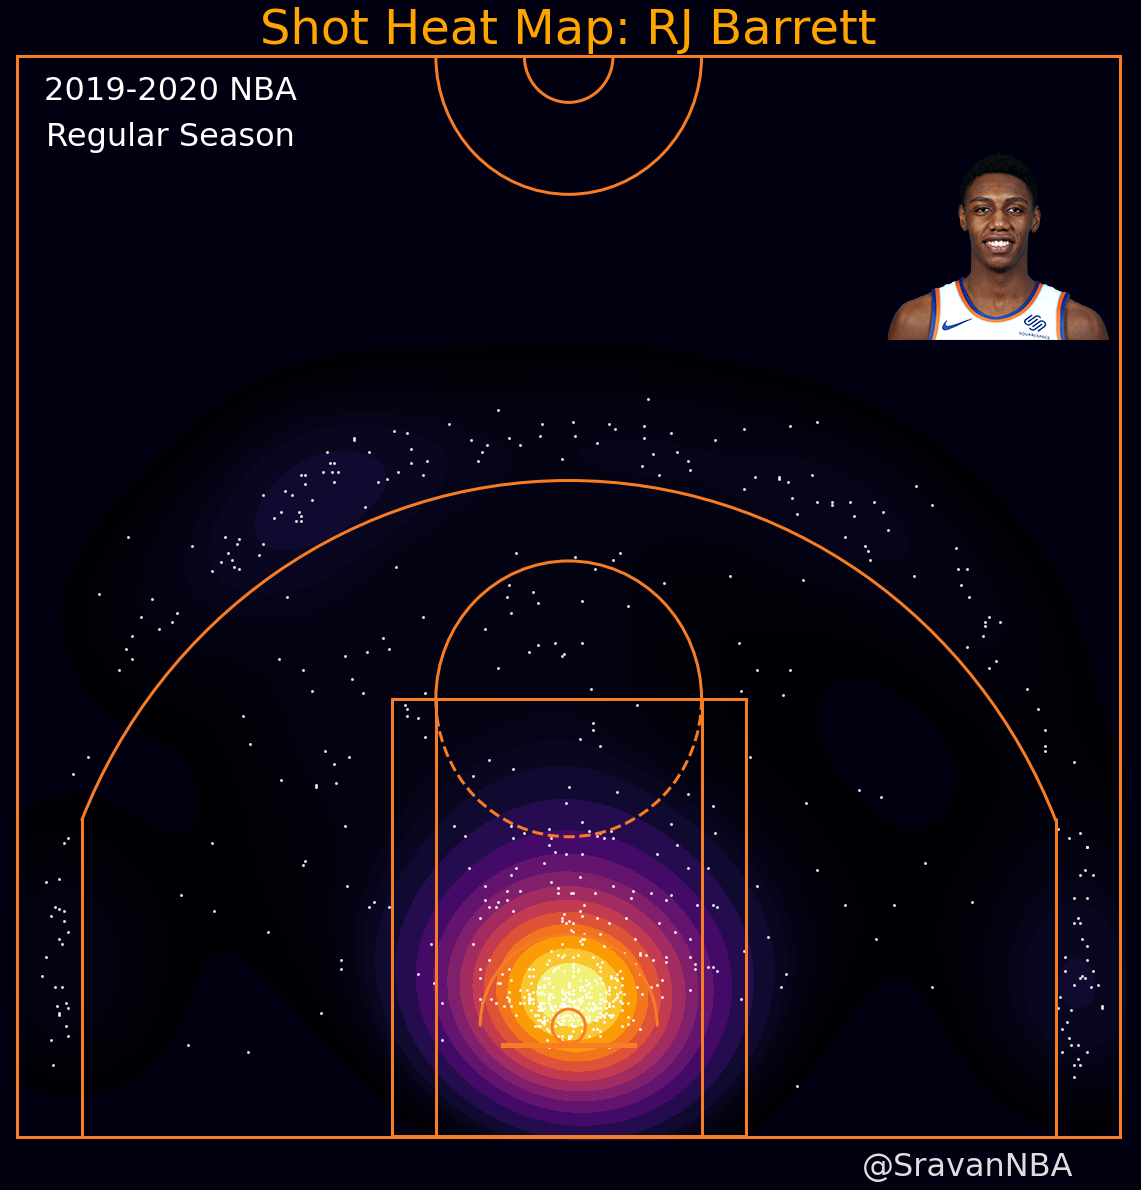

In [16]:
fig= plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

player = 'RJ Barrett'

d1 = 15
d2 = 22
t1 = 12
t2 = 16
cond1 = (data['player_name'] == player) 

cond2 = (data['shot_type'] != 'AtRim')
cond3 = (data['distance'] >= d1)
cond4 = (data['distance'] < d2)
cond5 = (data['poss_length'] >= 24)
cond6 = (data['poss_length'] <= 37)
cond7 = ((data['shot_type'] == 'Arc3') | (data['shot_type'] == 'Corner3'))
cond9 = (data['player_ast_name'] == player) 
cond0 = (data['is_made']==True)

shots_df = data[cond1]
# shots_df = data[cond1 & cond7 & cond0 ]
player_id = shots_df['player_id'].iloc[1]
# player_id = shots_df['player_ast_id'].iloc[1]

ax.set_xlim(252,-252)
ax.set_ylim(-50,423)
ax.set_facecolor(bball_black)
fig.set_facecolor(bball_black)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
draw_court(ax=ax,outer_lines=True, lw=3, color=bball_orange)
sns.kdeplot( x = shots_df.locX, y = shots_df.locY, shade=True, cmap='inferno',levels=21,ax=ax)
ax.scatter(x = shots_df.locX, y = shots_df.locY, facecolors='w', s=5, linewidths=0.5)

ax.text(x=-180, y=-65, s="@SravanNBA", color=bball_white, fontsize=fontsize, ha='center')
target_dir = 'player_imgs'
if f"{player_id}.png" not in os.listdir(target_dir):
    url = f"https://cdn.nba.com/headshots/nba/latest/260x190/{player_id}.png"
    response = requests.get(url)
    with open(f'player_imgs/{player_id}.png', 'wb') as f:
        f.write(response.content)
ab = AnnotationBbox(OffsetImage(plt.imread(f'player_imgs/{player_id}.png'), zoom=1.0), (-195, 340), frameon=False)
ax.add_artist(ab)
# ax.set_title('Shot Heat Map: Distance (ft) > {0} '.format(d1,d2), size=title_size, color='Orange')
# ax.set_title('Shot Heat Map: {0} < Distance (ft) < {1}'.format(d1,d2), size=title_size, color='Orange')
# plt.savefig('Shot_Heat_Map_dis_{0}_{1}.png'.format(d1,d2), bbox_inches='tight', facecolor=bball_black,dpi=300)
ax.text(x=180, y=400, s="{0}-{1} NBA".format(from_year,from_year+1), color='White', fontsize=fontsize, ha='center',va='bottom')
ax.text(x=180, y=380, s="Regular Season", color='White', fontsize=fontsize, ha='center',va='bottom')
# ax.text(x=-180, y=400, s="Makes Only", color='White', fontsize=fontsize, ha='center',va='bottom')
# ax.text(x=-180, y=380, s="Non-Rim Attempts", color='White', fontsize=fontsize, ha='center',va='bottom')
ax.set_title('Shot Heat Map: {0}'.format(player), size=title_size, color='Orange')
plt.savefig('Shot_Heat_Map_{0}.png'.format(player), bbox_inches='tight', facecolor=bball_black,dpi=300)
# ax.set_title('Shots Assisted by: {0}'.format(player), size=title_size, color='Orange')
# plt.savefig('Assist_Heat_Map_{0}.png'.format(player), bbox_inches='tight', facecolor=bball_black,dpi=300)

# ax.set_title('NBA Shot Heat Map: {0}-{1}'.format(from_year,from_year+1), size=title_size, color='Orange')
# plt.savefig('Shot_Heat_Map_{0}_{1}.png'.format(from_year,from_year+1), bbox_inches='tight', facecolor=bball_black,dpi=300)
plt.show()